In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('hillstrom.csv')

In [68]:
df.visit.value_counts()

0    54606
1     9394
Name: visit, dtype: int64

In [69]:
df.segment.value_counts()

Womens E-Mail    21387
Mens E-Mail      21307
No E-Mail        21306
Name: segment, dtype: int64

In [88]:
!pip install --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org  pywin32

Error processing line 7 of C:\Users\ERNRO\Documents\uplift\uplift\upliftenv\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "c:\users\ernro\appdata\local\programs\python\python37\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored
Error processing line 7 of C:\Users\ERNRO\Documents\uplift\uplift\upliftenv\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "c:\users\ernro\appdata\local\programs\python\python37\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored


In [83]:
!pip install imblearn

Error processing line 7 of C:\Users\ERNRO\Documents\uplift\uplift\upliftenv\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "c:\users\ernro\appdata\local\programs\python\python37\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored
Error processing line 7 of C:\Users\ERNRO\Documents\uplift\uplift\upliftenv\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "c:\users\ernro\appdata\local\programs\python\python37\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored


In [89]:
df.corr()

,recency,history,mens,womens,newbie,visit,conversion,spend
recency,1.000000,-0.246591,-0.031336,-0.026617,-0.052106,-0.074765,-0.024412,-0.016348
history,-0.246591,1.000000,0.112677,0.114685,0.223279,0.065153,0.029405,0.021729
mens,-0.031336,0.112677,1.000000,-0.816943,0.020900,0.006712,0.002492,0.008599
womens,-0.026617,0.114685,-0.816943,1.000000,0.021346,0.051999,0.012702,0.002173
newbie,-0.052106,0.223279,0.020900,0.021346,1.000000,-0.073924,-0.011331,-0.007623
visit,-0.074765,0.065153,0.006712,0.051999,-0.073924,1.000000,0.230165,0.168507
conversion,-0.024412,0.029405,0.002492,0.012702,-0.011331,0.230165,1.000000,0.732114
spend,-0.016348,0.021729,0.008599,0.002173,-0.007623,0.168507,0.732114,1.000000


In [90]:
df.visit.value_counts()

0    54606
1     9394
Name: visit, dtype: int64

In [91]:
features = ['recency', 'history', 'mens', 'womens', 'zip_code', 'newbie', 'channel', 'segment']
data = df.drop('history_segment', axis=1)
training = pd.get_dummies(data[features])
target = data[['visit', 'conversion', 'spend']]

In [92]:
for a in data.segment.unique():
    print(a)
    print(data.loc[data.segment == a].visit.value_counts())
    print(data.loc[data.segment == a].conversion.value_counts())

Womens E-Mail
0    18149
1     3238
Name: visit, dtype: int64
0    21198
1      189
Name: conversion, dtype: int64
No E-Mail
0    19044
1     2262
Name: visit, dtype: int64
0    21184
1      122
Name: conversion, dtype: int64
Mens E-Mail
0    17413
1     3894
Name: visit, dtype: int64
0    21040
1      267
Name: conversion, dtype: int64


In [93]:
import seaborn as sns

In [94]:
features1 = ['recency', 'history', 'mens', 'womens', 'zip_code',
       'newbie', 'channel', 'segment']
#target_cols = ['visit', 'conversion', 'spend']
#t1 = df.loc[df.segment == 'Womens E-Mail']
#t2 = df.loc[df.segment == 'Mens E-Mail']
#c = df.loc[df.segment == 'No E-Mail']
#X = df[features]
#y = df[target_cols]

In [95]:
data1 = df[features1]
target1 = df['visit']

# Visit Model

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train1 = pd.get_dummies(data1)
#c_train = scaler.fit_transform(c_train)
X_train, X_test, y_train, y_test = train_test_split(train1, 
                                                    target1, 
                                                    test_size=.3,
                                                    random_state=42)

In [99]:
from sklearn.linear_model import LogisticRegression, Lasso, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from lightgbm import LGBMClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix

clf1 = CalibratedClassifierCV(RandomForestClassifier(class_weight='balanced'),
                             method='isotonic', cv=10)
clf1.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight='balanced',
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                         

In [104]:
X_test.shape

(19200, 14)

In [105]:
y_pred_proba = clf1.predict_proba(X_test)[:,1]
y_pred = [1 if x > .17 else 0 for x in y_pred_proba]
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82     16389
           1       0.18      0.28      0.22      2811

    accuracy                           0.71     19200
   macro avg       0.52      0.53      0.52     19200
weighted avg       0.76      0.71      0.73     19200

[[12806  3583]
 [ 2025   786]]


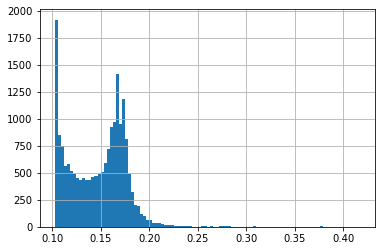

In [106]:
pd.Series(y_pred_proba).hist(bins=100)

In [107]:
probs = {'RandomForest' : y_pred_proba}

In [108]:
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss

def proba_scoring(proba_dict, label):
    '''Computes the log_loss and brier_score_loss metrics.'''
    score = {}
    for name in proba_dict.keys():
        
        ll = np.round(log_loss(label, proba_dict[name]),3)
        bl = np.round(brier_score_loss(label, proba_dict[name]),3)
        
        score[name] = [ll, bl]
    return score

In [109]:
score = proba_scoring(probs, y_test)

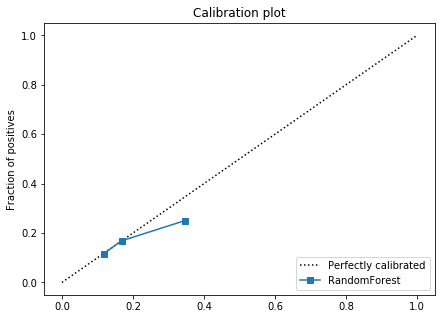

In [110]:
from sklearn.calibration import calibration_curve
fig = plt.figure(figsize=(7, 5))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for name in probs.keys():
    frac_of_pos, mean_pred_value = calibration_curve(y_test, probs[name], n_bins=7)

    plt.plot(mean_pred_value, frac_of_pos, "s-", label=f'{name}')

plt.ylabel("Fraction of positives")
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.title(f'Calibration plot')
plt.show()
fig.savefig('plots/Calibration_plot.png')

## Conversion Model

In [112]:
features2 = features1 + ['visit']

In [113]:
train2 = pd.get_dummies(df[features2])
target2 = df['conversion']

X_train, X_test, y_train, y_test = train_test_split(train2, 
                                                    target2, 
                                                    test_size=.3,
                                                    random_state=42)
clf2 = CalibratedClassifierCV(RandomForestClassifier(class_weight='balanced'),
                             method='isotonic', cv=10)
clf2.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight='balanced',
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                         

In [114]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
y_pred = [1 if x > .05 else 0 for x in y_pred_proba]
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     19024
           1       0.06      0.33      0.11       176

    accuracy                           0.95     19200
   macro avg       0.53      0.64      0.54     19200
weighted avg       0.99      0.95      0.97     19200

[[18176   848]
 [  118    58]]


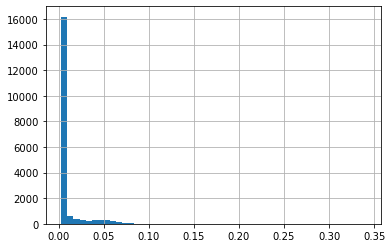

In [115]:
pd.Series(y_pred_proba).hist(bins=50)

In [116]:
probs = {'RandomForest' : y_pred_proba}

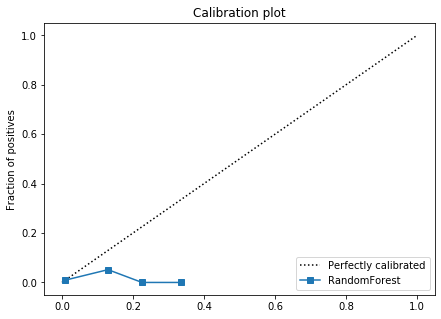

In [117]:
from sklearn.calibration import calibration_curve
fig = plt.figure(figsize=(7, 5))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for name in probs.keys():
    frac_of_pos, mean_pred_value = calibration_curve(y_test, probs[name], n_bins=10)

    plt.plot(mean_pred_value, frac_of_pos, "s-", label=f'{name}')

plt.ylabel("Fraction of positives")
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.title(f'Calibration plot')
plt.show()
fig.savefig('plots/Calibration_plot.png')

# Spending Model

In [118]:
df.columns

Index(['recency', 'history_segment', 'history', 'mens', 'womens', 'zip_code',
       'newbie', 'channel', 'segment', 'visit', 'conversion', 'spend'],
      dtype='object')

In [119]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
s = df.copy()
features = ['recency', 'history', 'mens', 'womens', 'zip_code',
       'newbie', 'channel', 'segment', 'visit', 'conversion']
spend_train = pd.get_dummies(s[features])
spend_target = s['spend']

X_train, X_test, y_train, y_test = train_test_split(spend_train, 
                                                    spend_target, 
                                                    test_size=.3,
                                                    random_state=42)
model1 = GradientBoostingRegressor()
model2 = RandomForestRegressor()
model3 = LGBMRegressor()

er = VotingRegressor([('gbm', model1), ('rf', model2), ('lgbm', model3)])
er.fit(X_train, y_train)

VotingRegressor(estimators=[('gbm',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                   

In [120]:
from sklearn.metrics import mean_squared_error
y_pred = er.predict(X_test)

In [121]:
mean_squared_error(y_test, y_pred)

116.7108326101291

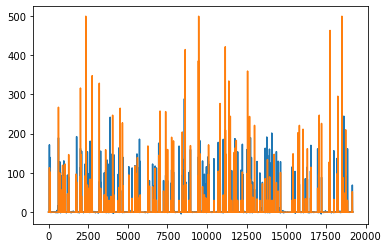

In [122]:
plt.plot(np.arange(len(y_pred)), y_pred)
plt.plot(np.arange(len(y_pred)), y_test)

In [131]:
val_data = X_test.copy()
val_data = val_data.drop(['visit', 'conversion'], axis=1)
visit_proba = clf1.predict_proba(val_data)[:,1]
val_data['visit'] = visit_proba

AttributeError: 'CalibratedClassifierCV' object has no attribute 'predit_proba'

In [132]:
purchase_proba = clf2.predict_proba(val_data)[:,1]

In [134]:
val_data2 = val_data.copy()
val_data2['conversion'] = purchase_proba

In [138]:
y_pred = er.predict(val_data2)
mean_squared_error(y_test, y_pred)

7231.574261795182

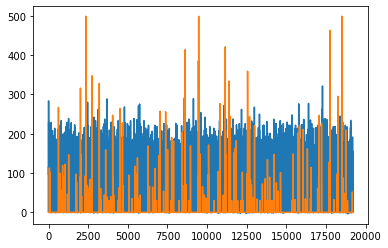

In [139]:
plt.plot(np.arange(len(y_pred)), y_pred)
plt.plot(np.arange(len(y_pred)), y_test)